# Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [2]:
df=pd.read_csv('C:\\Users\\msent\\Desktop\\technical skills\\dataset\\mumbai rent house data.csv')
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,...,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,...,72.825882,11-01-2020,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,...,72.833592,11-01-2020,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,...,72.801612,13-12-2019,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,...,72.836006,13-01-2020,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,...,72.850167,17-12-2019,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


# finding important variables

In [3]:
df.shape

(34348, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34348 entries, 0 to 34347
Data columns (total 23 columns):
area            33572 non-null float64
bathroom_num    34334 non-null float64
bedroom_num     34348 non-null int64
city            34348 non-null object
desc            34338 non-null object
dev_name        17349 non-null object
floor_count     31488 non-null float64
floor_num       31567 non-null float64
furnishing      34338 non-null object
id              34348 non-null int64
id_string       34348 non-null object
latitude        34348 non-null float64
locality        34140 non-null object
longitude       34348 non-null float64
post_date       34348 non-null object
poster_name     34347 non-null object
price           34348 non-null int64
project         20179 non-null object
title           34338 non-null object
trans           34318 non-null object
type            34348 non-null object
url             34338 non-null object
user_type       34348 non-null object
dtypes: float6

In [5]:
df.keys()

Index(['area', 'bathroom_num', 'bedroom_num', 'city', 'desc', 'dev_name',
       'floor_count', 'floor_num', 'furnishing', 'id', 'id_string', 'latitude',
       'locality', 'longitude', 'post_date', 'poster_name', 'price', 'project',
       'title', 'trans', 'type', 'url', 'user_type'],
      dtype='object')

In [6]:
#here we can see that there are 23 features 
# the target variable is price 
# the rest 22 are explanatory variables we need to find out the best ones

In [7]:
df.describe()

,area,bathroom_num,bedroom_num,floor_count,floor_num,id,latitude,longitude,price
count,33572.000000,34334.000000,34348.000000,31488.000000,31567.000000,3.434800e+04,34348.000000,34348.000000,3.434800e+04
mean,1177.387704,2.199278,2.076686,17.403551,8.577850,4.292717e+07,13.963273,52.420100,7.149190e+04
std,682.924385,0.880150,0.899821,13.996063,7.770904,6.954479e+06,9.131194,32.689143,7.717099e+04
min,10.000000,1.000000,1.000000,2.000000,-2.000000,2.074068e+06,0.000000,0.000000,2.200000e+03
25%,690.000000,2.000000,1.000000,7.000000,3.000000,4.249600e+07,0.000000,0.000000,3.200000e+04
50%,1040.000000,2.000000,2.000000,14.000000,6.000000,4.601324e+07,19.074359,72.839302,5.000000e+04
75%,1400.000000,3.000000,3.000000,22.000000,11.000000,4.678029e+07,19.150385,72.878328,8.000000e+04
max,9500.000000,8.000000,5.000000,120.000000,95.000000,4.733486e+07,73.071373,80.191436,1.200000e+06


In [8]:
#sns.pairplot(df)
 

In [9]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")
 
value_count(df)

1000.0    1518
650.0     1455
600.0     1124
1200.0    1047
1050.0     999
1100.0     993
700.0      771
1250.0     761
900.0      714
950.0      714
550.0      692
1500.0     689
850.0      596
750.0      577
1150.0     560
1400.0     505
1600.0     472
1300.0     453
800.0      421
500.0      417
1800.0     407
1350.0     394
1650.0     328
1450.0     301
450.0      301
2000.0     298
1700.0     247
575.0      195
350.0      194
1550.0     182
          ... 
551.0        1
1176.0       1
918.0        1
2874.0       1
959.0        1
2217.0       1
1482.0       1
497.0        1
3855.0       1
574.0        1
1781.0       1
979.0        1
6700.0       1
1907.0       1
1116.0       1
7950.0       1
1066.0       1
1578.0       1
1367.0       1
2430.0       1
616.0        1
1016.0       1
1063.0       1
3730.0       1
1243.0       1
1783.0       1
150.0        1
5200.0       1
423.0        1
4960.0       1
Name: area, Length: 1625, dtype: int64
--------------------------------
2.0    18805


Name: floor_count, Length: 88, dtype: int64
--------------------------------
 5.0     3264
 4.0     3103
 3.0     2788
 2.0     2487
 6.0     1969
 7.0     1839
 10.0    1802
 1.0     1767
 8.0     1354
 9.0     1288
 12.0    1127
 11.0    1082
 15.0     828
 14.0     722
 0.0      611
 16.0     609
 13.0     551
 18.0     519
 20.0     415
 17.0     391
 19.0     350
-1.0      309
 21.0     278
 22.0     257
 25.0     234
 24.0     166
 23.0     150
 30.0     133
 26.0     126
 28.0     116
         ... 
 38.0      29
 42.0      25
 50.0      24
 44.0      21
 41.0      19
 39.0      17
 45.0      16
 43.0      14
 52.0      12
 51.0       9
 46.0       9
 47.0       8
 56.0       8
 54.0       7
 53.0       6
 49.0       6
 48.0       6
 64.0       5
 60.0       3
 57.0       3
 63.0       3
 55.0       3
 61.0       3
 58.0       2
 65.0       2
 62.0       1
 59.0       1
 90.0       1
 68.0       1
 95.0       1
Name: floor_num, Length: 71, dtype: int64
---------------------------

--------------------------------
Crescent Bay                             285
New Cuffe Parade                         268
Vasant Oasis                             263
Lodha The Park                           220
Wadhwa Atmosphere                        194
Godrej The Trees                         178
Emerald Isle                             176
Runwal Greens                            170
Nahar Amrit Shakti                       150
Hiranandani Gardens                      148
Western Heights                          144
Kanakia Paris                            137
Lodha Fiorenza                           130
Runwal Elegante                          113
JP Decks Blue                            113
Lodha Park                               111
Godrej Central                           106
Man Opus                                 104
HDIL Metropolis                           99
Imperial Heights                          96
Kalpataru Estates                         95
Wadhwa The Address    

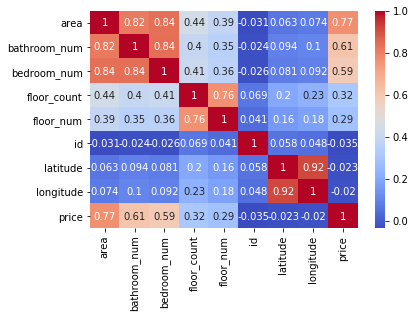

In [10]:
# correlation heatmap for numerical variables
num_var = ["area","bathroom_num","bedroom_num","floor_count", "floor_num","id", "latitude",
       "longitude","price"]
sns.heatmap(df[num_var].corr(),cmap="coolwarm", annot=True)

In [11]:
# here we can see that id, longitude and latitude has negative correlation with target variable
# So drop that variables

In [12]:
df1=df.drop(['id','latitude', 'longitude','floor_num'],axis=1)
df1.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,furnishing,id_string,locality,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,Unfurnished,domcache_srp_45349857,Malad West,11-01-2020,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,Semi-Furnished,domcache_srp_45960973,Vasai,11-01-2020,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,Semi-Furnished,domcache_srp_46688849,Virar,13-12-2019,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,Semi-Furnished,domcache_srp_44696119,Vasai East,13-01-2020,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,Furnished,domcache_srp_46742851,Naigaon East,17-12-2019,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


In [13]:
#some variables can be extracted by domain knowledge
# So drop the unnecessary variables
df2=df1.drop(['city', 'desc', 'dev_name', 'id_string', 'post_date', 'poster_name','project',
       'title', 'trans', 'url', 'user_type'],axis=1)
df2.head()

,area,bathroom_num,bedroom_num,floor_count,furnishing,locality,price,type
0,350.0,2.0,1,NaN,Unfurnished,Malad West,9000,Apartment
1,652.0,2.0,1,NaN,Semi-Furnished,Vasai,8060,Apartment
2,635.0,2.0,1,7.0,Semi-Furnished,Virar,8000,Apartment
3,540.0,2.0,1,NaN,Semi-Furnished,Vasai East,8000,Apartment
4,625.0,1.0,1,7.0,Furnished,Naigaon East,9000,Apartment


In [14]:
df2.shape

(34348, 8)

# data cleaning

In [15]:
df2.isnull().sum()

area             776
bathroom_num      14
bedroom_num        0
floor_count     2860
furnishing        10
locality         208
price              0
type               0
dtype: int64

In [16]:
null_variable=df2.isnull().sum()/df2.shape[0]*100
null_variable

area            2.259229
bathroom_num    0.040759
bedroom_num     0.000000
floor_count     8.326540
furnishing      0.029114
locality        0.605567
price           0.000000
type            0.000000
dtype: float64

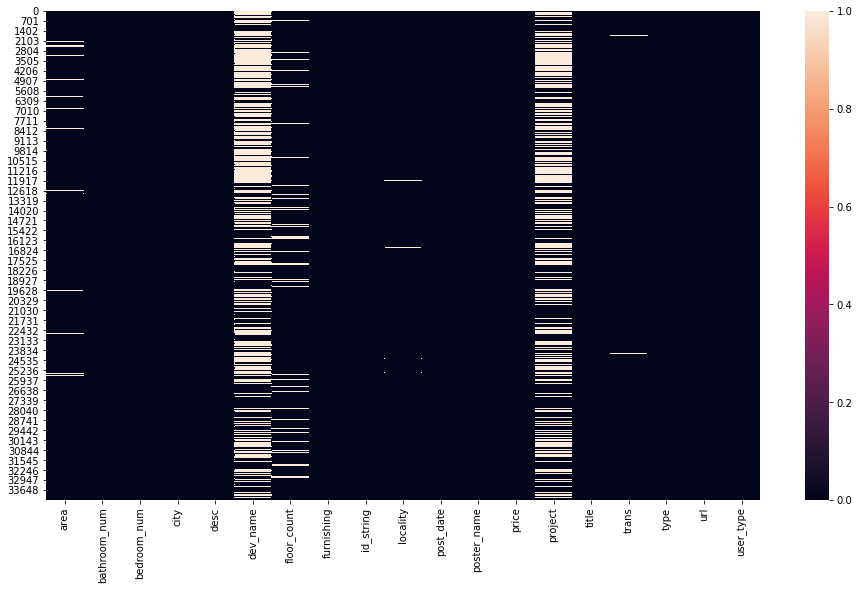

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())

In [18]:
# fill mean value in --------> arae feature
# because it contain 2.25% missing value
df2['area'] = df2['area'].fillna(df2['area'].mean())
df2.isnull().sum()

area               0
bathroom_num      14
bedroom_num        0
floor_count     2860
furnishing        10
locality         208
price              0
type               0
dtype: int64

In [19]:
df3=df2.dropna()

In [20]:
df3.isnull().sum()

area            0
bathroom_num    0
bedroom_num     0
floor_count     0
furnishing      0
locality        0
price           0
type            0
dtype: int64

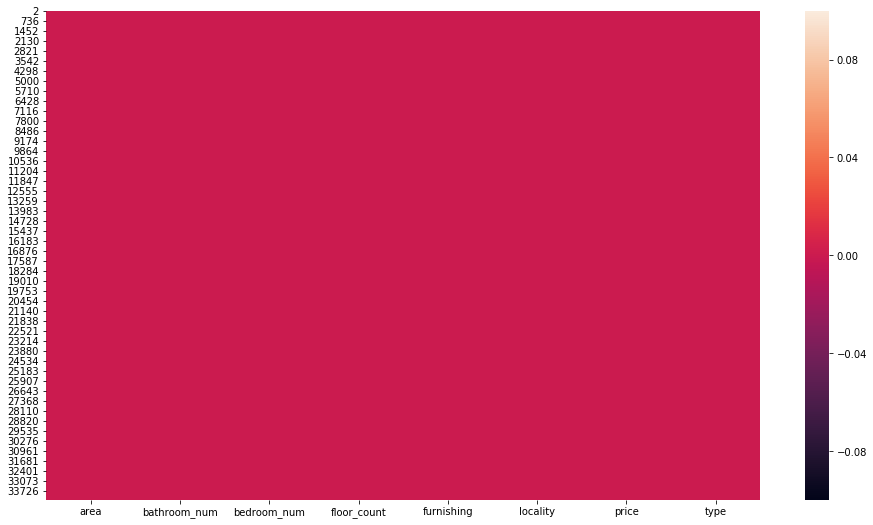

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.isnull())

In [22]:
print(df2.shape)
print(df3.shape)

(34348, 8)
(31263, 8)


# Feature Engineering

In [23]:
#we have price for total given area so we need to make an variable price per Sq ft
#lets first check the values of the area variable
df3['area'].unique()


array([635., 625., 630., ..., 150., 663., 642.])

In [24]:
# here we can see that there is no mixed values in Area variable
#lets make a new variable price_per_sqft
df3['price_per_sqft'] = df3['price'] / df3['area']  
df3.head()

C:\Users\msent\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area,bathroom_num,bedroom_num,floor_count,furnishing,locality,price,type,price_per_sqft
2,635.0,2.0,1,7.0,Semi-Furnished,Virar,8000,Apartment,12.598425
4,625.0,1.0,1,7.0,Furnished,Naigaon East,9000,Apartment,14.400000
5,630.0,2.0,1,15.0,Unfurnished,Virar West,8000,Apartment,12.698413
6,690.0,2.0,1,7.0,Furnished,Virar,8500,Apartment,12.318841
7,338.0,1.0,1,5.0,Unfurnished,Royal Palms Estate,10000,Apartment,29.585799


In [25]:
#Rename the variables name according to your choices
df3.rename(columns = {'area':'Area','bathroom_num':'bathroom','bedroom_num':'bhk','furnishing':'Condition','locality':'location'},inplace=True)
df3.head()

C:\Users\msent\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Area,bathroom,bhk,floor_count,Condition,location,price,type,price_per_sqft
2,635.0,2.0,1,7.0,Semi-Furnished,Virar,8000,Apartment,12.598425
4,625.0,1.0,1,7.0,Furnished,Naigaon East,9000,Apartment,14.400000
5,630.0,2.0,1,15.0,Unfurnished,Virar West,8000,Apartment,12.698413
6,690.0,2.0,1,7.0,Furnished,Virar,8500,Apartment,12.318841
7,338.0,1.0,1,5.0,Unfurnished,Royal Palms Estate,10000,Apartment,29.585799


In [26]:
display(df3.dtypes) 

Area              float64
bathroom          float64
bhk                 int64
floor_count       float64
Condition          object
location           object
price               int64
type               object
price_per_sqft    float64
dtype: object

In [27]:
################### bathroom feature ###############
# data type for bathroom variable is float lets convert it into integer data type
df3['bathroom']=df3['bathroom'].astype(int)
display(df3.dtypes) 

C:\Users\msent\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Area              float64
bathroom            int32
bhk                 int64
floor_count       float64
Condition          object
location           object
price               int64
type               object
price_per_sqft    float64
dtype: object

In [28]:
df3.head()

,Area,bathroom,bhk,floor_count,Condition,location,price,type,price_per_sqft
2,635.0,2,1,7.0,Semi-Furnished,Virar,8000,Apartment,12.598425
4,625.0,1,1,7.0,Furnished,Naigaon East,9000,Apartment,14.400000
5,630.0,2,1,15.0,Unfurnished,Virar West,8000,Apartment,12.698413
6,690.0,2,1,7.0,Furnished,Virar,8500,Apartment,12.318841
7,338.0,1,1,5.0,Unfurnished,Royal Palms Estate,10000,Apartment,29.585799


In [29]:
######################## BHK feature ######################
df3['bhk'].unique()


array([1, 3, 4, 5, 2], dtype=int64)

In [30]:
######################## floor_count feature ######################

In [31]:
df3['floor_count'].unique()

array([  7.,  15.,   5.,  12.,   6.,   4.,  22.,   2.,   3.,   9.,  24.,
         8.,  20.,  34.,  10.,  14.,  16.,  25.,  18.,  23.,  13.,  21.,
        54.,  56.,  36.,  28.,  19.,  33.,  17.,  38.,  40.,  39.,  31.,
        41.,  55.,  37.,  45.,  27.,  30.,  42.,  48.,  32.,  50.,  44.,
        11.,  53.,  58.,  43.,  29.,  26.,  35.,  75.,  77.,  65.,  51.,
        52.,  63.,  72.,  60.,  78.,  68.,  64.,  70.,  59.,  79.,  66.,
       117.,  49.,  57.,  76.,  88.,  69.,  80.,  46.,  89.,  61., 120.,
        62., 111.,  81.,  47.,  74.,  83.,  73.,  67., 113.,  71.,  85.])

In [32]:
df3['floor_count'].value_counts()

7.0      5253
22.0     1649
4.0      1646
20.0     1551
8.0      1496
12.0     1486
15.0     1274
14.0     1101
10.0     1046
6.0      1042
18.0      995
3.0       821
16.0      800
21.0      674
11.0      630
13.0      614
23.0      587
24.0      548
17.0      537
9.0       517
5.0       473
19.0      455
27.0      422
40.0      400
25.0      384
36.0      335
30.0      312
28.0      298
45.0      273
35.0      232
         ... 
76.0       27
72.0       27
56.0       26
59.0       25
63.0       23
46.0       22
58.0       19
80.0       17
68.0       16
69.0       16
53.0       16
47.0       13
61.0       12
64.0       11
57.0        9
73.0        7
81.0        7
74.0        6
62.0        5
85.0        4
89.0        3
66.0        3
67.0        3
117.0       3
83.0        2
120.0       2
71.0        2
88.0        1
113.0       1
111.0       1
Name: floor_count, Length: 88, dtype: int64

In [33]:
df3['floor_count']=df3['floor_count'].astype(int)
display(df3.dtypes) 

C:\Users\msent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Area              float64
bathroom            int32
bhk                 int64
floor_count         int32
Condition          object
location           object
price               int64
type               object
price_per_sqft    float64
dtype: object

In [34]:
df3['floor_count'].unique()

array([  7,  15,   5,  12,   6,   4,  22,   2,   3,   9,  24,   8,  20,
        34,  10,  14,  16,  25,  18,  23,  13,  21,  54,  56,  36,  28,
        19,  33,  17,  38,  40,  39,  31,  41,  55,  37,  45,  27,  30,
        42,  48,  32,  50,  44,  11,  53,  58,  43,  29,  26,  35,  75,
        77,  65,  51,  52,  63,  72,  60,  78,  68,  64,  70,  59,  79,
        66, 117,  49,  57,  76,  88,  69,  80,  46,  89,  61, 120,  62,
       111,  81,  47,  74,  83,  73,  67, 113,  71,  85], dtype=int64)

In [35]:
df3['floor_count'].describe()

count    31263.000000
mean        17.457826
std         14.015556
min          2.000000
25%          7.000000
50%         14.000000
75%         22.000000
max        120.000000
Name: floor_count, dtype: float64

In [36]:
print(df3['floor_count'].mode())

0    7
dtype: int32


In [37]:
######################## floor_num feature ######################
#df3['floor_num']=df3['floor_num'].astype(int)
#display(df3.dtypes)

In [38]:
########################## Categorical variables #############

In [39]:
df3.keys()

Index(['Area', 'bathroom', 'bhk', 'floor_count', 'Condition', 'location',
       'price', 'type', 'price_per_sqft'],
      dtype='object')

In [40]:
df3['Condition'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [41]:
df3['Condition'].value_counts()

Semi-Furnished    12628
Unfurnished       10606
Furnished          8029
Name: Condition, dtype: int64

In [42]:
len(df3['location'].unique())

816

In [43]:
# The feature location contains 816 different location observation
# count how many no of observations are for each location

In [44]:
df3.location=df3.location.apply(lambda x:x.strip())

location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\msent\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


location
Andheri West                      1342
Powai                             1271
Chembur                           1178
Andheri East                      1064
Bandra West                        976
Worli                              966
Bhandup West                       835
Mulund West                        766
Thakur Village, Kandivali East     706
Goregaon East                      629
Parel                              566
Mira Road                          517
Khar West                          509
Chandivali                         476
Prabhadevi                         474
Malad West                         448
Thakur Complex                     415
Lower Parel                        407
Lokhandwala Complex                391
Santacruz East                     364
Vile Parle East                    351
Ghatkopar West                     335
Goregaon West                      335
Kandivali East                     323
Santacruz West                     315
Marol           

In [45]:
#remove the locations which contains 10 or less than 10 observation
len(location_stats[location_stats<=10])

545

In [46]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Dahisar                         10
Uppar Colaba                    10
Juhu Beach Area                 10
Takshila Nagar                  10
Mulund                          10
Kannamwar Nagar 1               10
Nana Chowk                      10
Marine Lines                    10
Nalasopara                      10
Sarvodaya Nagar                 10
Virar East                      10
Garodia Nagar                   10
Khar                            10
Marine Drive                    10
Mehboob Studio                  10
Pleasant Park                   10
Abhyudaya Nagar                 10
Kannamwar Nagar 2                9
Alika Nagar                      9
Ghodapdeo                        9
Rani Laxmibai Chowk              9
Irla                             9
Dattani Park                     9
Azad Nagar Versova Road          9
Marol Naka                       9
Acharya A Maharaj Chowk          9
Nityanand Nagar                  9
Nai Gaon                         9
Sion Hospit

In [47]:
df3.location=df3.location.apply(lambda x: 'other'if x in location_stats_lessthan_10 else x)
len(df3.location.unique())

272

In [48]:
df3.head(15)

,Area,bathroom,bhk,floor_count,Condition,location,price,type,price_per_sqft
2,635.0,2,1,7,Semi-Furnished,Virar,8000,Apartment,12.598425
4,625.0,1,1,7,Furnished,Naigaon East,9000,Apartment,14.400000
5,630.0,2,1,15,Unfurnished,Virar West,8000,Apartment,12.698413
6,690.0,2,1,7,Furnished,Virar,8500,Apartment,12.318841
7,338.0,1,1,5,Unfurnished,Royal Palms Estate,10000,Apartment,29.585799
8,675.0,2,1,12,Furnished,Virar,9000,Apartment,13.333333
9,500.0,1,1,6,Semi-Furnished,Virar West,8000,Apartment,16.000000
10,850.0,2,1,7,Unfurnished,Virar,8000,Apartment,9.411765
12,630.0,2,1,12,Unfurnished,Virar West,8000,Apartment,12.698413
13,730.0,2,1,7,Unfurnished,Virar,8000,Apartment,10.958904


In [49]:
df3['type'].unique()

array(['Apartment', 'Builder Floor Apartment', 'Service Apartment',
       'Multistorey Apartment', 'Residential House', 'Penthouse'],
      dtype=object)

In [50]:
df3['type'].value_counts()

Apartment                  30607
Builder Floor Apartment      352
Multistorey Apartment        252
Penthouse                     22
Residential House             20
Service Apartment             10
Name: type, dtype: int64

In [51]:
print(len(df3['type']))
print(len(df3.loc[df3['type']=='Apartment']))

31263
30607


In [52]:
percentage_Apartmnt_values=(len(df3.loc[df3['type']=='Apartment'])/len(df3['type']))*100
print(percentage_Apartmnt_values)

97.9016729040719


In [53]:
# 97.90% data values are for Apartment type data 
# Remove the other type data from the data set
df4=df3.loc[df3['type']=='Apartment']
print(df3.shape)
print(df4.shape)

(31263, 9)
(30607, 9)


In [54]:
df4.type.unique()

array(['Apartment'], dtype=object)

In [55]:
# Also the type variable is not for any use as it contains only apartment type 
# Remove it from explanatory varaible
df5=df4.drop(['type'],axis=1)
print(df5.shape)

(30607, 8)


# Outliers

In [56]:
######### Area

In [57]:
df5['Area'].describe()

count    30607.000000
mean      1175.828533
std        655.436371
min         10.000000
25%        700.000000
50%       1050.000000
75%       1400.000000
max       9500.000000
Name: Area, dtype: float64

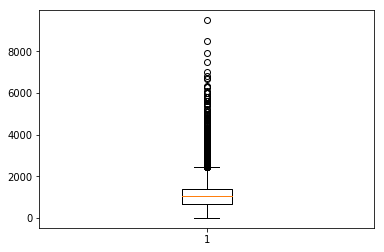

In [58]:
plt.boxplot(df5['Area'])
plt.show()

In [59]:
df5[df5.Area/df5.bhk<250].head(15)

,Area,bathroom,bhk,floor_count,Condition,location,price,price_per_sqft
18,225.0,1,1,7,Semi-Furnished,Andheri East,10000,44.444444
21,225.0,1,1,7,Furnished,Mulund East,10000,44.444444
54,225.0,1,1,4,Unfurnished,Borivali West,9500,42.222222
71,220.0,1,1,4,Semi-Furnished,Sakinaka,9000,40.909091
74,130.0,1,1,6,Unfurnished,other,10000,76.923077
76,225.0,1,1,7,Semi-Furnished,other,10000,44.444444
78,225.0,1,1,24,Unfurnished,Kandivali East,10000,44.444444
89,225.0,1,1,7,Semi-Furnished,Nahur West,8000,35.555556
112,210.0,1,1,7,Furnished,Khar West,8000,38.095238
384,225.0,1,1,4,Unfurnished,Borivali West,11500,51.111111


In [60]:
len(df5[df5.Area/df5.bhk<250])

101

In [61]:
df6=df5[~(df5.Area/df5.bhk<250)]
print(df5.shape)
print(df6.shape)

(30607, 8)
(30506, 8)


In [62]:
#### Price_per_sqft

In [63]:
df6.price_per_sqft.describe()

count    30506.000000
mean        57.612971
std         31.872822
min          3.076923
25%         38.256878
50%         50.000000
75%         69.230769
max       1000.000000
Name: price_per_sqft, dtype: float64

In [64]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df7 = remove_pps_outliers(df6)
print(df6.shape)
print(df7.shape)

(30506, 8)
(23683, 8)


In [65]:
df7.location.unique()

array(['4 Bunglows', 'Aarey Milk Colony', 'Agripada', 'Akurli Nagar',
       'Altamount Road', 'Amboli', 'Andheri East', 'Andheri West',
       'Antop Hill', 'Asha Nagar', 'Ashok Nagar Western Mumbai',
       'Azad Nagar', 'BEST Housing Colony', 'Bandra', 'Bandra Band Stand',
       'Bandra East', 'Bandra Kurla Complex', 'Bandra Reclamation',
       'Bandra West', 'Bangur Nagar', 'Best Nagar - Goregaon West',
       'Beverly Park', 'Bhakti Park', 'Bhandup', 'Bhandup East',
       'Bhandup Industrial Estate', 'Bhandup West', 'Bhavani Nagar',
       'Bhayandar East', 'Bhayandar West', 'Bhoiwada', 'Bimbisar Nagar',
       'Borivali East', 'Borivali West', 'Breach Candy', 'Byculla',
       'CAMA Industrial Estate', 'Carter Road', 'Central Area',
       'Central Avenue Road', 'Chakala', 'Chakala MIDC', 'Chandivali',
       'Charkop', 'Charkop Sector 2', 'Charkop Sector 8', 'Charni Road',
       'Chembur', 'Chembur Colony', 'Chiku Wadi', 'Chinchpokli',
       'Chunabhatti', 'Church Gate', 'C

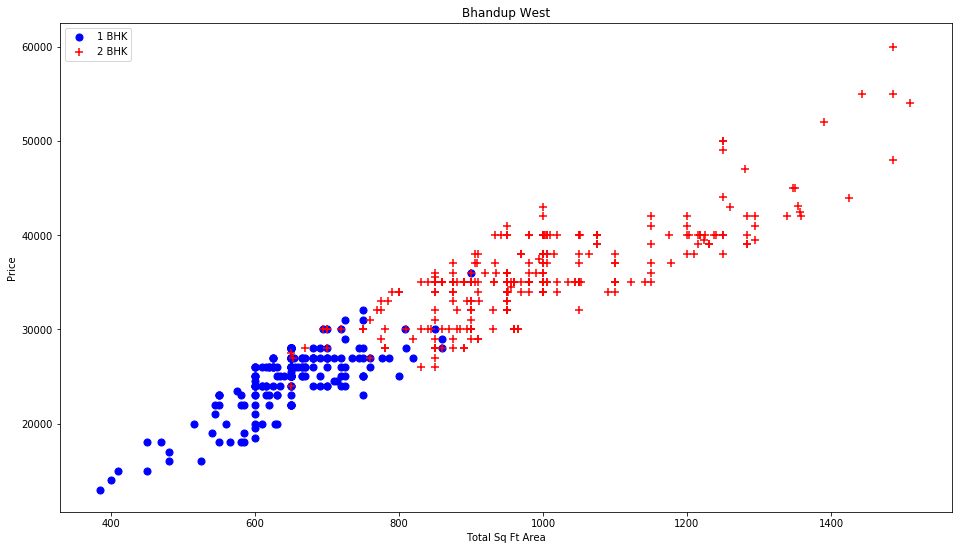

In [66]:
 
def plot_scatter_chart(df,location):
  bhk1 = df[(df.location==location) & (df.bhk==1)]
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk1.Area, bhk1.price, color='Blue', label='1 BHK', s=50)
  plt.scatter(bhk2.Area, bhk2.price, color='Red', label='2 BHK', s=50, marker="+")
  plt.xlabel("Total Sq Ft Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df7, "Bhandup West")

In [67]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df8 = remove_bhk_outliers(df7)
print(df7.shape)
print(df8.shape)

(23683, 8)
(14596, 8)


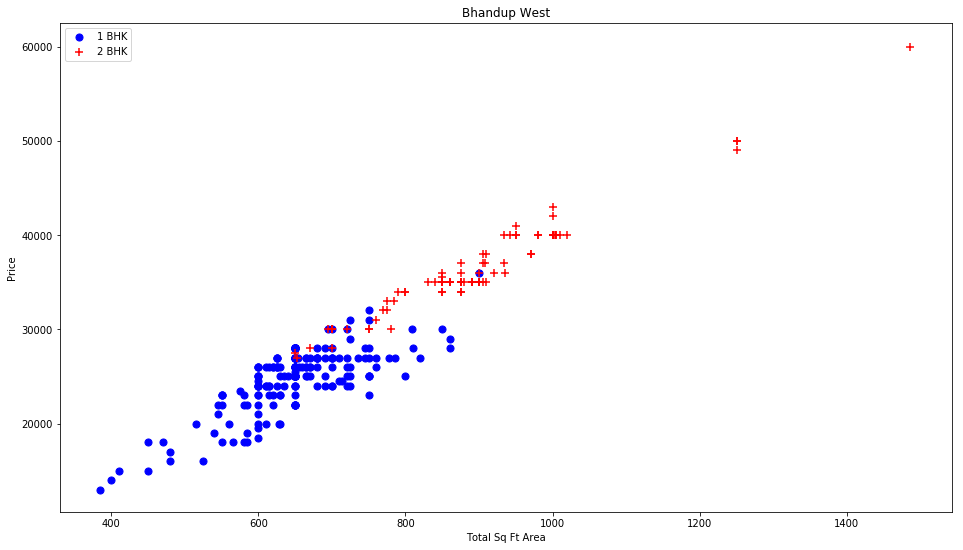

In [68]:
plot_scatter_chart(df8, "Bhandup West")

Text(0, 0.5, 'count')

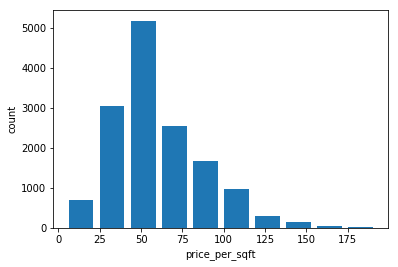

In [69]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [70]:
### bathroom
df8[df8.bathroom>5]

,Area,bathroom,bhk,floor_count,Condition,location,price,price_per_sqft
255,2800.0,6,4,31,Semi-Furnished,Andheri East,140000,50.000000
257,2600.0,6,4,20,Semi-Furnished,Andheri East,150000,57.692308
258,2600.0,6,4,32,Semi-Furnished,Andheri East,145000,55.769231
260,2600.0,6,4,32,Semi-Furnished,Andheri East,145000,55.769231
262,3200.0,6,4,31,Furnished,Andheri East,190000,59.375000
263,3195.0,6,4,32,Semi-Furnished,Andheri East,172500,53.990610
265,3195.0,6,4,32,Semi-Furnished,Andheri East,175000,54.773083
3888,910.0,6,2,16,Furnished,Bhandup West,35000,38.461538
4673,3500.0,6,4,24,Semi-Furnished,Central Area,185000,52.857143
4811,3100.0,6,5,10,Unfurnished,Chakala,135000,43.548387


Text(0, 0.5, 'count')

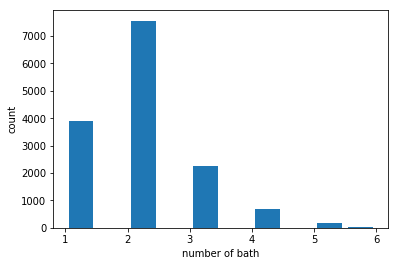

In [71]:
plt.hist(df8.bathroom,rwidth=0.8)
plt.xlabel("number of bath")
plt.ylabel("count")


In [72]:
df8[df8.bathroom>df8.bhk+2]

,Area,bathroom,bhk,floor_count,Condition,location,price,price_per_sqft
3888,910.0,6,2,16,Furnished,Bhandup West,35000,38.461538
15855,1550.0,4,1,8,Unfurnished,Powai,100000,64.516129
20064,600.0,5,1,6,Semi-Furnished,Vikhroli East,28000,46.666667


In [73]:
df9=df8[df8.bathroom<df8.bhk+2]
print(df8.shape)
print(df9.shape)

(14596, 8)
(14522, 8)


In [74]:
df9.keys()

Index(['Area', 'bathroom', 'bhk', 'floor_count', 'Condition', 'location',
       'price', 'price_per_sqft'],
      dtype='object')

In [75]:
############ Categorical Variable Encoding

In [76]:
obj_df=df9.select_dtypes(include=['object']).copy()
obj_df.tail(10)

,Condition,location
23673,Semi-Furnished,other
23674,Furnished,other
23675,Semi-Furnished,other
23676,Unfurnished,other
23677,Furnished,other
23678,Unfurnished,other
23679,Unfurnished,other
23680,Unfurnished,other
23681,Unfurnished,other
23682,Unfurnished,other


In [77]:
df10 = pd.get_dummies(df9, drop_first=True, columns=['Condition','location'])
df10.shape


(14522, 279)

In [78]:
df10.head()

,Area,bathroom,bhk,floor_count,price,price_per_sqft,Condition_Semi-Furnished,Condition_Unfurnished,location_Aarey Milk Colony,location_Agripada,...,location_Walkeshwar,location_Waterfield Road,location_World Trade Centre,location_Worli,location_Worli Hill,location_Worli Naka Acharaya Atre Chowk,location_Worli Sea Face,location_Yari Road,location_Yeshodham,location_other
1,1800.0,4,4,25,125000,69.444444,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4,4,30,150000,57.692308,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4,4,30,165000,64.152411,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4,4,28,165000,68.750000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1,1,4,23000,51.111111,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#In ['Condition','location'] contain multiple classe and if we convert them into OHE so it increase the size of DF 
#so use those classes which are *frequently* present in the car var
 

In [80]:
## Working on <<<< Location >>>> feature"""
 
location_value_count = df9['location'].value_counts()
location_value_count
 

other                             890
Powai                             554
Andheri West                      541
Bandra West                       501
Worli                             495
Andheri East                      486
Chembur                           454
Goregaon East                     319
Bhandup West                      309
Prabhadevi                        292
Thakur Village, Kandivali East    261
Lower Parel                       256
Mulund West                       250
Mira Road                         237
Thakur Complex                    225
Malad West                        214
Khar West                         202
Santacruz East                    186
Lokhandwala Complex               181
Goregaon West                     163
Vile Parle East                   160
Parel                             157
Chandivali                        156
Bandra Kurla Complex              144
Marol                             142
Virar West                        138
Santacruz We

In [81]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20
 

Index(['other', 'Powai', 'Andheri West', 'Bandra West', 'Worli',
       'Andheri East', 'Chembur', 'Goregaon East', 'Bhandup West',
       'Prabhadevi',
       ...
       'Chembur Colony', 'Jogeshwari West', 'Carter Road', 'Kanjurmarg West',
       'Royal Palms Estate', 'Juhu Tara Road', 'Kamala City', 'Kurla East',
       'World Trade Centre', 'Union Park'],
      dtype='object', length=133)

In [82]:
# location count is greter than 20 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df11 = df9.copy()
for cat_var in location_gert_20:
  df11['location_'+cat_var]=np.where(df11['location']==cat_var, 1,0)
df11.shape
 

(14522, 141)

In [83]:
df11.head()

,Area,bathroom,bhk,floor_count,Condition,location,price,price_per_sqft,location_other,location_Powai,...,location_Chembur Colony,location_Jogeshwari West,location_Carter Road,location_Kanjurmarg West,location_Royal Palms Estate,location_Juhu Tara Road,location_Kamala City,location_Kurla East,location_World Trade Centre,location_Union Park
1,1800.0,4,4,25,Furnished,4 Bunglows,125000,69.444444,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2600.0,4,4,30,Semi-Furnished,4 Bunglows,150000,57.692308,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2572.0,4,4,30,Unfurnished,4 Bunglows,165000,64.152411,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2400.0,4,4,28,Unfurnished,4 Bunglows,165000,68.750000,0,0,...,0,0,0,0,0,0,0,0,0,0
7,450.0,1,1,4,Unfurnished,4 Bunglows,23000,51.111111,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df12=pd.get_dummies(df11, columns=["Condition"])

In [85]:
df12.head()

,Area,bathroom,bhk,floor_count,location,price,price_per_sqft,location_other,location_Powai,location_Andheri West,...,location_Kanjurmarg West,location_Royal Palms Estate,location_Juhu Tara Road,location_Kamala City,location_Kurla East,location_World Trade Centre,location_Union Park,Condition_Furnished,Condition_Semi-Furnished,Condition_Unfurnished
1,1800.0,4,4,25,4 Bunglows,125000,69.444444,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2600.0,4,4,30,4 Bunglows,150000,57.692308,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2572.0,4,4,30,4 Bunglows,165000,64.152411,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2400.0,4,4,28,4 Bunglows,165000,68.750000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,450.0,1,1,4,4 Bunglows,23000,51.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
df12.shape

(14522, 143)

In [87]:
#we created the price_per_sqft for data manipulation
#Data manipulation have done so drop that variable


In [88]:
#df13=df12.reset_index()
#df13.head()

In [89]:
data=df12.drop(['location'],axis=1)


In [90]:
####### partition the variables into x and y
x=data.drop(['price'],axis=1)
x.head()

,Area,bathroom,bhk,floor_count,price_per_sqft,location_other,location_Powai,location_Andheri West,location_Bandra West,location_Worli,...,location_Kanjurmarg West,location_Royal Palms Estate,location_Juhu Tara Road,location_Kamala City,location_Kurla East,location_World Trade Centre,location_Union Park,Condition_Furnished,Condition_Semi-Furnished,Condition_Unfurnished
1,1800.0,4,4,25,69.444444,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2600.0,4,4,30,57.692308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2572.0,4,4,30,64.152411,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2400.0,4,4,28,68.750000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,450.0,1,1,4,51.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
y=data['price']
y.head()

1    125000
3    150000
5    165000
6    165000
7     23000
Name: price, dtype: int64

In [92]:
### train test split
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (11617, 141)
Shape of y_train =  (11617,)
Shape of x_test =  (2905, 141)
Shape of y_test =  (2905,)


In [93]:
## Feature Scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train= sc.transform(x_train)
x_test = sc.transform(x_test)

C:\Users\msent\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\msent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\msent\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

# Linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_score = lr.score(x_test, y_test) 
lr_rmse = rmse(y_test, lr.predict(x_test))
lr_score, lr_rmse



(0.9414531470330583, 15245.712476119288)

In [95]:
# Lasso 
from sklearn.linear_model import Lasso
lr_lasso = Lasso()
lr_lasso.fit(x_train, y_train)
lr_lasso_score=lr_lasso.score(x_test, y_test) 
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(x_test))
lr_lasso_score, lr_lasso_rmse
 

(0.9414641906651248, 15244.274516851061)

In [96]:
#Ridge

from sklearn.linear_model import Ridge
lr_ridge = Ridge()
lr_ridge.fit(x_train, y_train)
lr_ridge_score=lr_ridge.score(x_test, y_test) 
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(x_test))
lr_ridge_score, lr_ridge_rmse 
 

(0.9414675703375218, 15243.834432413329)

In [97]:
#Support Vector Machine-Regession
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_score=svr.score(x_test,y_test) 
svr_rmse = rmse(y_test, svr.predict(x_test))
svr_score, svr_rmse
 

(-0.12196240845792049, 66739.8306327165)

In [98]:
# Randon Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_score=rfr.score(x_test,y_test) 
rfr_rmse = rmse(y_test, rfr.predict(x_test))
rfr_score, rfr_rmse

C:\Users\msent\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9977701093099146, 2975.3477652599736)

In [99]:
#pip install xgboost

In [100]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)
xgb_reg_score=xgb_reg.score(x_test,y_test) 
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(x_test))
xgb_reg_score, xgb_reg_rmse


(0.9982809826093803, 2612.3783886124484)

In [101]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Ridge','Score':lr_ridge_score, "RMSE":lr_ridge_rmse},      
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score          RMSE
0       Linear Regression  0.941453  15245.712476
1                   Lasso  0.941464  15244.274517
2                   Ridge  0.941468  15243.834432
3  Support Vector Machine -0.121962  66739.830633
4           Random Forest  0.997770   2975.347765
5                 XGBoost  0.998281   2612.378389


In [102]:
## Cross Validation
## XGBoost
from sklearn.model_selection import KFold,cross_val_score
cvs_xgboost = cross_val_score(xgb_reg, x_train,y_train, cv = 10)
cvs_xgboost, 
print(cvs_xgboost.mean())



0.9938105616368453


In [103]:
cvs_rfr= cross_val_score(rfr, x_train,y_train, cv = 10)
cvs_rfr, 
print(cvs_rfr.mean())



0.9943122514078839


In [104]:
cvs_lr= cross_val_score(lr, x_train,y_train, cv = 10)
cvs_lr, 
print(cvs_lr.mean())


0.9470086911254156


In [105]:
# From the k fold cross validation it can be seen the Ensambke learning method XGBoost algorithm is best to use to solve real life problem

In [106]:
x.columns

Index(['Area', 'bathroom', 'bhk', 'floor_count', 'price_per_sqft',
       'location_other', 'location_Powai', 'location_Andheri West',
       'location_Bandra West', 'location_Worli',
       ...
       'location_Kanjurmarg West', 'location_Royal Palms Estate',
       'location_Juhu Tara Road', 'location_Kamala City',
       'location_Kurla East', 'location_World Trade Centre',
       'location_Union Park', 'Condition_Furnished',
       'Condition_Semi-Furnished', 'Condition_Unfurnished'],
      dtype='object', length=141)

In [107]:
def predict_house_price(model,Area,bathroom,bhk,floor_count,location,Condition):
    
    X=np.zeros(len(x.columns))
    
    X[0]=Area
    X[1]=bathroom
    X[2]=bhk
    X[3]=floor_count
    
    if 'location_'+location in x.columns:
        location_index = np.where(x.columns=="location_"+location)[0][0]
        X[location_index] =1
    
    
    if 'Condition_'+Condition in x.columns:
            Condition_index = np.where(x.columns=="Condition_"+Condition)[0][0]
            X[Condition_index] =1
            
            X = sc.transform([X])[0]
            
            return model.predict([X])[0]

In [114]:
predict_house_price(model=rfr,Area=450,bathroom=1,bhk=1,floor_count=7,Condition="Unfurnished",location="Virar")


5300.0

In [116]:
import pickle
with open('mumbai_house_rent_model.pickle','wb') as f:
    pickle.dump(rfr,f)

In [118]:
import json 
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))